# Derived-Term Automata of Multitape Expressions with Composition

*This is still an early draft.  This page will be updated during May 2017.*

This page is a complement to the paper [Derived-Term Automata of Multitape Expressions with Composition](https://www.lrde.epita.fr/wiki/Publications/demaille.17.sacs).  This page exists in several forms:
- [A Dynamic Notebook](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/SACS-2017.ipynb), which can be edited, played with
- [A static HTML page](http://www.lrde.epita.fr/dload/vcsn/latest/notebooks/SACS-2017.html), whose graphical rendering is always correct.

More information is available here:
- [Documentation for _expression_.expansion](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/expression.expansion.ipynb)
- [Documentation for _expression_.derived_term](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/expression.derived_term.ipynb)
- [Documentation of Vcsn](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/!Read-me-first.ipynb)
- [Vcsn's web page](http://vcsn.lrde.epita.fr)

You may change the cells, and run then.  To run a cell in a notebook, hit "Control-Enter" (in which case the focus stays on the same cell) or "Shift-Enter" (focus goes to the next cell).  Beware that depending on the requested operations, Vcsn may generate and compile code, which may be a really slow process on small machines (about a minute): be patient!  However, the code is compiled only once: successive uses will be way faster.

To run all the cells anew, select "Restart & Run All" in the "Kernel" menu above.

In [1]:
import vcsn
vcsn.table = vcsn.ipython.table
vcsn.setenv(DENORM=1)

# Introduction: Motivating Examples
First we introduce the _context_ we are interested in: labels are letter-or-empty-word, two tapes, weights are in the tropical semiring $\mathbb{Z}_{\min} := \langle \mathbb{Z}, \min, +, \infty, 0 \rangle$.

In [2]:
zmin2 = vcsn.context('lat<lan, lan>, zmin')
zmin2

{...}? x {...}? -> Zmin

The following examples show how the multiplication and addition of $\mathbb{Z}_{\min}$ behave:

In [3]:
zmin2.weight('1') * zmin2.weight('3')

4

In [4]:
zmin2.weight('1') + zmin2.weight('3')

1

The first automaton, $\mathcal{A}$, is obtained from the following rational expression (the empty word is noted `\e` in Vcsn, and rendered $\varepsilon$ even as an expression, whereas in the paper it is written $\mathsf{1}$).

In [5]:
zmin2.expression(r'(a|a+b|b+⟨1⟩(\e|(a+b)+(a+b)|\e))∗')

(a|a+b|b+<1>(\e|(a+b)+(a+b)|\e))*

Or, using syntactic sugar ($a := a|a$, $[ab] := a+b$):

In [6]:
e1 = zmin2.expression(r'([ab] + ⟨1⟩(\e|[ab] + [ab]|\e))∗')
e1

(a|a+b|b+<1>(\e|(a+b)+(a+b)|\e))*

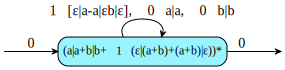

In [7]:
a1 = e1.derived_term()
a1

The automaton from Ng is:

In [8]:
e2 = zmin2.expression('[ab]∗ (⟨1⟩(\e|[ab] + [ab]|\e) + ⟨2⟩(a|b + b|a))∗')
e2

(a|a+b|b)*(<2>(a|b+b|a)+<1>(\e|(a+b)+(a+b)|\e))*

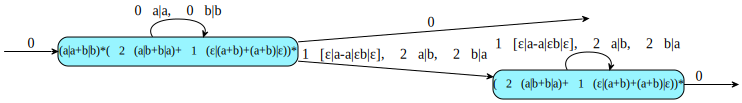

In [9]:
e2.derived_term()

Or, cleaned from state decorations:

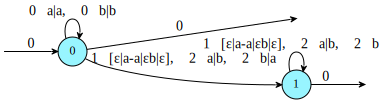

In [10]:
a2 = e2.automaton('expansion')
a2

Mohri factors his automaton $\mathcal{A}$ in the composition of $\mathcal{A}_1$ and $\mathcal{A}_2$:

In [11]:
f1 = zmin2.expression('([ab] + ⟨1⟩(\e|i + [ab]|s))∗')
f2 = zmin2.expression('([ab] + i|[ab] + s|\e)∗')
f = f1.compose(f2)
vcsn.table([[f1, f1.derived_term()],
            [f2, f2.derived_term()],
            [f, f.derived_term()]])

[[(a|a+b|b+<1>(\e|i+(a+b)|s))*,
  expression_automaton<mutable_automaton<context<lat<nullableset<letterset<char_letters>>, nullableset<letterset<char_letters>>>, zmin>>>],
 [(a|a+b|b+s|\e+i|(a+b))*,
  expression_automaton<mutable_automaton<context<lat<nullableset<letterset<char_letters>>, nullableset<letterset<char_letters>>>, zmin>>>],
 [(a|a+b|b+<1>(\e|i+(a+b)|s))*@(a|a+b|b+s|\e+i|(a+b))*,
  expression_automaton<mutable_automaton<context<lat<nullableset<letterset<char_letters>>, nullableset<letterset<char_letters>>>, zmin>>>]]

Note that the resulting automaton (once trimmed) is exactly the automaton $\mathcal{A}$.

# Example $\mathsf{E}_1$: A Simple Multitape Expression
First we introduce the _context_ we are interested in: labels are letter-or-empty-word, two tapes, weights are rational numbers.

In [12]:
ctx = vcsn.context('lat<lan(abcde), lan(xy)>, q')
ctx

{abcde}? x {xy}? -> Q

The expression $\mathsf{E}_1$ is:

In [13]:
e1 = ctx.expression('⟨4⟩ade*|x + ⟨3⟩bde*|x + ⟨2⟩ace*|xy + ⟨6⟩bce*|xy')
e1

<4>(ade*)|x+<3>(bde*)|x+<2>(ace*)|xy+<6>(bce*)|xy

Its expansion is (contrary to the paper, the empty expression is denoted $\varepsilon$ instead of $\mathsf{1}$):

In [14]:
e1.expansion()

a|x.[<2>ce*|y + <4>de*|\e] + b|x.[<6>ce*|y + <3>de*|\e]

The derived-term automaton of $\mathsf{E}_1$, $\mathcal{A}_{\mathsf{E}_1}$, is:

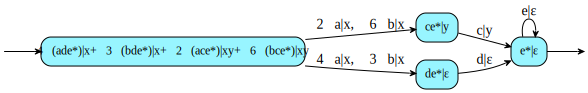

In [15]:
a1 = e1.derived_term()
a1

The 10 shortest "multitape words" it accepts are:

In [16]:
a1.shortest(10)

<2>ac|xy + <4>ad|x + <6>bc|xy + <3>bd|x + <2>ace|xy + <4>ade|x + <6>bce|xy + <3>bde|x + <2>acee|xy + <4>adee|x

# Example $\mathcal{A}_3$: An Exponential Number of States
We introduce a three-tape context.  The graphical rendering is less satisfying.

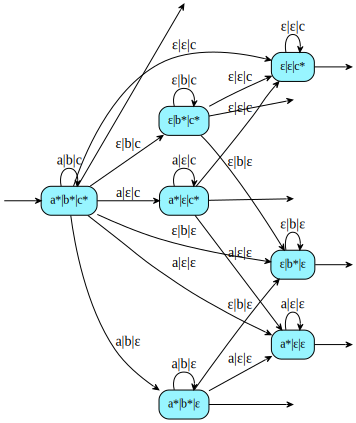

In [17]:
q3 = vcsn.context('lat<lan, lan, lan>, q')
a3 = q3.expression('a*|b*|c*').derived_term()
a3

Currently Vcsn is not able to extract nice rational expressions from such an automaton: it will always produce a "simple-tape expression over multitape generators":

In [18]:
a3.expression()

(a|b|c)*(\e+(\e|\e|c)(\e|\e|c)*+(\e|b|\e)(\e|b|\e)*+(a|\e|\e)(a|\e|\e)*+(\e|b|c)(\e|b|c)*(\e+(\e|\e|c)(\e|\e|c)*+(\e|b|\e)(\e|b|\e)*)+(a|\e|c)(a|\e|c)*(\e+(\e|\e|c)(\e|\e|c)*+(a|\e|\e)(a|\e|\e)*)+(a|b|\e)(a|b|\e)*(\e+(\e|b|\e)(\e|b|\e)*+(a|\e|\e)(a|\e|\e)*))

Instead of displaying the automaton, we may list its states, for instance in the case of a five-tape expression.

In [19]:
import re
def states(a):
    '''The states of an automaton, sorted.'''
    res = re.findall(r'label = "(.*?)", shape', a.dot(), re.M)
    res.sort()
    return res

q5 = vcsn.context('lat<lan(a), lan(b), lan(c), lan(d), lan(e)>, q')
e5 = q5.expression('a*|b*|c*|d*|e*')
e5

a*|b*|c*|d*|e*

In [20]:
e5.expansion()

<1> + \e|\e|\e|\e|e.[\e|\e|\e|\e|e*] + \e|\e|\e|d|\e.[\e|\e|\e|d*|\e] + \e|\e|\e|d|e.[\e|\e|\e|d*|e*] + \e|\e|c|\e|\e.[\e|\e|c*|\e|\e] + \e|\e|c|\e|e.[\e|\e|c*|\e|e*] + \e|\e|c|d|\e.[\e|\e|c*|d*|\e] + \e|\e|c|d|e.[\e|\e|c*|d*|e*] + \e|b|\e|\e|\e.[\e|b*|\e|\e|\e] + \e|b|\e|\e|e.[\e|b*|\e|\e|e*] + \e|b|\e|d|\e.[\e|b*|\e|d*|\e] + \e|b|\e|d|e.[\e|b*|\e|d*|e*] + \e|b|c|\e|\e.[\e|b*|c*|\e|\e] + \e|b|c|\e|e.[\e|b*|c*|\e|e*] + \e|b|c|d|\e.[\e|b*|c*|d*|\e] + \e|b|c|d|e.[\e|b*|c*|d*|e*] + a|\e|\e|\e|\e.[a*|\e|\e|\e|\e] + a|\e|\e|\e|e.[a*|\e|\e|\e|e*] + a|\e|\e|d|\e.[a*|\e|\e|d*|\e] + a|\e|\e|d|e.[a*|\e|\e|d*|e*] + a|\e|c|\e|\e.[a*|\e|c*|\e|\e] + a|\e|c|\e|e.[a*|\e|c*|\e|e*] + a|\e|c|d|\e.[a*|\e|c*|d*|\e] + a|\e|c|d|e.[a*|\e|c*|d*|e*] + a|b|\e|\e|\e.[a*|b*|\e|\e|\e] + a|b|\e|\e|e.[a*|b*|\e|\e|e*] + a|b|\e|d|\e.[a*|b*|\e|d*|\e] + a|b|\e|d|e.[a*|b*|\e|d*|e*] + a|b|c|\e|\e.[a*|b*|c*|\e|\e] + a|b|c|\e|e.[a*|b*|c*|\e|e*] + a|b|c|d|\e.[a*|b*|c*|d*|\e] + a|b|c|d|e.[a*|b*|c*|d*|e*]

In [21]:
a5 = e5.derived_term()
states(a5)

['a*|b*|c*|d*|e*',
 'a*|b*|c*|d*|ε',
 'a*|b*|c*|ε|e*',
 'a*|b*|c*|ε|ε',
 'a*|b*|ε|d*|e*',
 'a*|b*|ε|d*|ε',
 'a*|b*|ε|ε|e*',
 'a*|b*|ε|ε|ε',
 'a*|ε|c*|d*|e*',
 'a*|ε|c*|d*|ε',
 'a*|ε|c*|ε|e*',
 'a*|ε|c*|ε|ε',
 'a*|ε|ε|d*|e*',
 'a*|ε|ε|d*|ε',
 'a*|ε|ε|ε|e*',
 'a*|ε|ε|ε|ε',
 'ε|b*|c*|d*|e*',
 'ε|b*|c*|d*|ε',
 'ε|b*|c*|ε|e*',
 'ε|b*|c*|ε|ε',
 'ε|b*|ε|d*|e*',
 'ε|b*|ε|d*|ε',
 'ε|b*|ε|ε|e*',
 'ε|b*|ε|ε|ε',
 'ε|ε|c*|d*|e*',
 'ε|ε|c*|d*|ε',
 'ε|ε|c*|ε|e*',
 'ε|ε|c*|ε|ε',
 'ε|ε|ε|d*|e*',
 'ε|ε|ε|d*|ε',
 'ε|ε|ε|ε|e*']

## Example $\mathsf{E}_2$: A Sed-like Substitution

In [22]:
e2 = ctx.expression('(a{+}|x + b{+}|y)*')
e2

(aa*|x+bb*|y)*

In [23]:
e2.expansion()

<1> + a|x.[(a*|\e)(aa*|x+bb*|y)*] + b|y.[(b*|\e)(aa*|x+bb*|y)*]

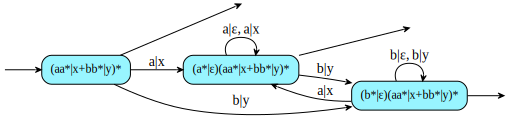

In [24]:
a2 = e2.derived_term()
a2

Again, the extracted expression is less readable.

In [25]:
a2.expression()

\e+(a|x)(a|\e+a|x)*+(b|y+(a|x)(a|\e+a|x)*(b|y))(b|\e+b|y+(a|x)(a|\e+a|x)*(b|y))*(\e+(a|x)(a|\e+a|x)*)

## A More Complex Expression
The previous examples often look like sed-like substitutions, in the sense that the first tape was often a composite expression, but the second tape a simple label.  There is no such limitation.

In [26]:
e = ctx.expression('(<2>[ab])* | (<3>[xy])*')
e

(<2>(a+b))*|(<3>(x+y))*

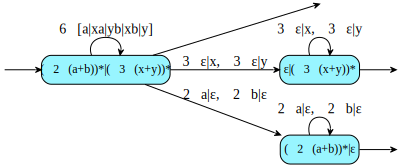

In [27]:
a = e.derived_term()
a

In [28]:
print('{:l}'.format(a.shortest(20)))

\e|\e
<3>\e|x
<3>\e|y
<2>a|\e
<6>a|x
<6>a|y
<2>b|\e
<6>b|x
<6>b|y
<9>\e|xx
<9>\e|xy
<9>\e|yx
<9>\e|yy
<18>a|xx
<18>a|xy
<18>a|yx
<18>a|yy
<18>b|xx
<18>b|xy
<18>b|yx


## Section 5.3: Derived-Term Automaton with Composition

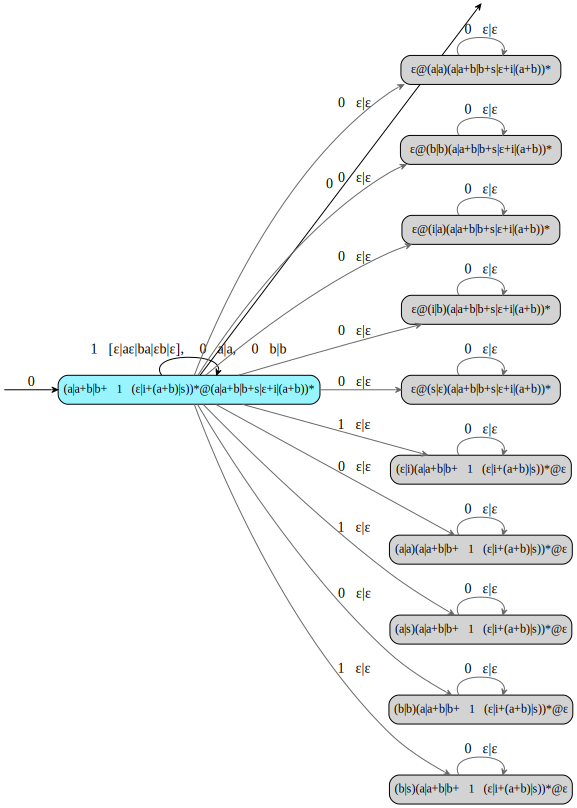

In [29]:
f1 = zmin2.expression('([ab] + ⟨1⟩(\e|i + [ab]|s))∗')
f2 = zmin2.expression('([ab] + i|[ab] + s|\e)∗')
f = f1.compose(f2) # f1 @ f2 with Python 3.5+.
f.derived_term()

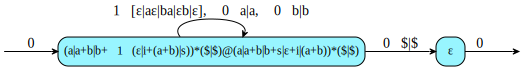

In [30]:
f1 = zmin2.expression('([ab] + ⟨1⟩(\e|i + [ab]|s))∗($|$)')
f2 = zmin2.expression('([ab] + i|[ab] + s|\e)∗($|$)')
f = f1.compose(f2) # f1 @ f2 with Python 3.5+.
f.derived_term()

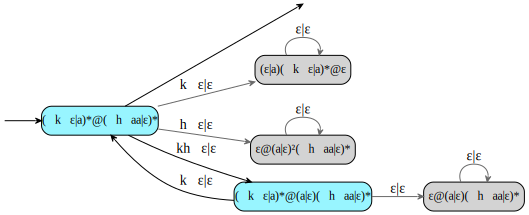

In [31]:
eset2 = vcsn.context('lat<lan, lan>, expressionset<lan, q>')
eset2.expression('(⟨k⟩\e|a)∗ @ (⟨h⟩aa|\e)∗').derived_term()

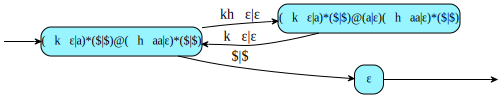

In [32]:
eset2 = vcsn.context('lat<lan, lan>, expressionset<lan, q>')
eset2.expression('(⟨k⟩\e|a)∗($|$) @ (⟨h⟩aa|\e)∗($|$)').derived_term()

## Discussion: Identities

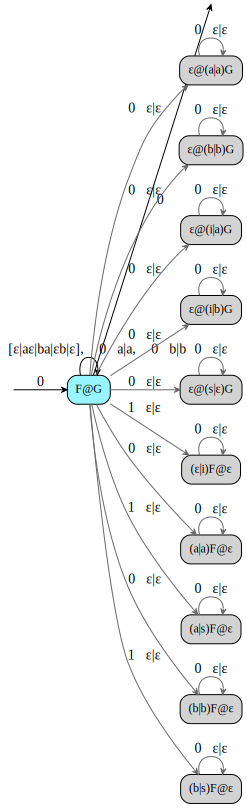

In [33]:
import vcsn
f = zmin2.expression('([ab] + ⟨1⟩(\e|i + [ab]|s))∗').name('F')
g = zmin2.expression('([ab] + i|[ab] + s|\e)∗').name('G')
#f = c.expression('(⟨1⟩(\e|i))∗').name('F')
#g = c.expression('(i|[a])∗').name('G')
e = f.compose(g)
e.derived_term()

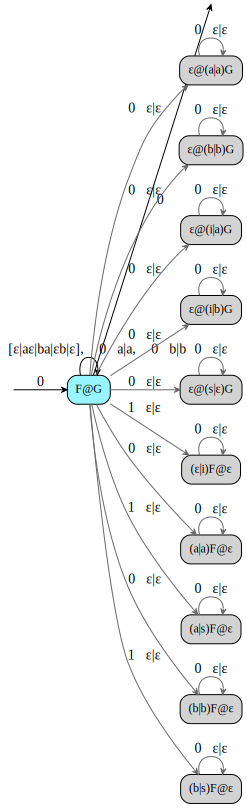

In [34]:
import vcsn
f = zmin2.expression('([ab] + ⟨1⟩(\e|i + [ab]|s))∗').name('F')
g = zmin2.expression('([ab] + i|[ab] + s|\e)∗').name('G')
#f = c.expression('(⟨1⟩(\e|i))∗').name('F')
#g = c.expression('(i|[a])∗').name('G')
e = f.compose(g)
e.derived_term()

## Size of the result

In [35]:
import vcsn
c = vcsn.context('lan(abc), zmin')
c2 = c|c
c2

{abc}? x {abc}? -> Zmin

In [36]:
from vcsn.tools import _timeit
def timeit(fun):
    '''Run `fun` a number of times, and return its fastest run in milliseconds.'''
    return '{}ms'.format(round(_timeit(lambda: fun())[1]))

def compare(e):
    # Make sure this is an object expression, not just a string.
    if not isinstance(e, vcsn.expression):
        e = zmin2.expression(e)
    # Compute its derived-term automaton.
    a1 = e.automaton('expansion')
    t1 = timeit(lambda: e.automaton('expansion'))
    # Compute another automaton by mapping operators to one of their natural implementation.
    # In the case of single-tape automata, this yield the standard (aka Glushkov) automaton.
    a2 = e.automaton('inductive')
    t2 = timeit(lambda: e.automaton('inductive'))
    # Return their numbers of states.
    return [e, a1.state_number(), a2.state_number(), t1, t2]

In [37]:
# ignore: \d+ms
compare('a|a + b|b')

[a|a+b|b, 2, 3, '15ms', '10ms']

In [38]:
# ignore: \d+ms
compare('(<0>(a|a + b|b))*')

[(a|a+b|b)*, 1, 3, '16ms', '15ms']

In [39]:
# ignore: \d+ms
compare('(<0>[ab] + <1>([ab]|\e + \e|[ab]))*')

[(a|a+b|b+<1>(\e|(a+b)+(a+b)|\e))*, 1, 7, '48ms', '75ms']

In [40]:
# ignore: \d+ms
zmin = vcsn.context('lan, zmin')
zmin2 = zmin|zmin
zmin2
compare('([ab] + <1>(\e|i+[ab]|s))* @ ([ab] + i|[ab] + s|[ab]?)*')

[(a|a+b|b+<1>(\e|i+(a+b)|s))*@(a|a+b|b+i|(a+b)+s|(\e+a+b))*,
 1,
 11,
 '311ms',
 '267ms']

In [41]:
# ignore: \d+ms
compare('(a{+}|x + b{+}|y)*')

[(aa*|x+bb*|y)*, 3, 5, '121ms', '53ms']

In [42]:
# ignore cell
from IPython.display import display
res = [["Expression", 'Derived-term', 'Inductive', 'DT (ms)', 'Ind (ms)']]
for i in range(10):
    e = c2.random_expression('+, ., *=.2, w., .w, w="min=0, max=3", |=.5, @', length=20)
    c = compare(e)
    # print(c)
    res.append(c)
vcsn.table(res)

Expression,Derived-term,Inductive,DT (ms),Ind (ms)
"$ \left\langle 3 \right\rangle \,\left({\left(\left(\varepsilon|b\right) \, \left(\varepsilon|b + a|a\right)\right)^{*}}^{*}@ \left\langle 8 \right\rangle \,\left(\varepsilon|b\right)\right)$",2,2,34ms,48ms
"$ \left\langle 1 \right\rangle \,\left(\left(\varepsilon + b|a\right)@\left(c|\varepsilon + c|a@ \left. \left(\varepsilon + c\right) \middle| \left\langle 4 \right\rangle \,\varepsilon \right. \right)\right)$",0,1,28ms,56ms
"$ \left\langle 5 \right\rangle \,\left( \left\langle 3 \right\rangle \,\left(b|\varepsilon\right) + \left\langle 1 \right\rangle \,\left(c|a\right)\right)@\left(\varepsilon + a|\varepsilon\right)$",2,3,22ms,44ms
"$ \left\langle 5 \right\rangle \,\varepsilon@\left(b|\varepsilon\right)^{*}@b|\varepsilon$",0,1,31ms,33ms
$\emptyset$,0,1,9ms,2ms
"$ \left. \left\langle 9 \right\rangle \,\left(b \, c\right) \middle| \left\langle 5 \right\rangle \,\left({b}^{2}\right) \right. $",3,3,27ms,27ms
"$\varepsilon|c + \left(\varepsilon + b|\varepsilon\right) \, \left(\left(b|\varepsilon\right) \, \left(a|\varepsilon\right) + \left(c|c\right) \, \left(\varepsilon|a\right)\right)@\varepsilon|c$",4,8,50ms,72ms
"$\left(a|\varepsilon + a|b + c|c\right) \, \left(\varepsilon@ \left. \left\langle 5 \right\rangle \,\varepsilon \middle| \left(\varepsilon + \left\langle 2 \right\rangle \,a\right) \right. \right)$",3,5,37ms,59ms
"$\varepsilon|c@\left( \left\langle 3 \right\rangle \,\left(a|c\right) + b|\varepsilon + \left(c|b\right) \, \left(\varepsilon|c\right)\right)$",3,3,20ms,44ms
"$ \left\langle 2 \right\rangle \,\left( \left. \left\langle 1 \right\rangle \,{\varepsilon}^{*} \middle| \left(\varepsilon + c\right) \right. \right)@ \left\langle 2 \right\rangle \,\left(c|a@\left(a|\varepsilon\right) \, \left(c|a\right)\right)$",0,2,24ms,55ms


In [43]:
# ignore: \d+ms
res = [["Expression", 'Derived-term', 'Inductive', 'DT (ms)', 'Ind (ms)']]
for i in range(20):
    e = c2.expression('[ab]*  (a|b){{{}}}  [ab]*'.format(i))
    res.append(compare(e))
vcsn.table(res)

Expression,Derived-term,Inductive,DT (ms),Ind (ms)
${\left(a|a + b|b\right)^{*}}^{2}$,2,5,29ms,38ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right) \, \left(a|a + b|b\right)^{*}$",2,6,26ms,47ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{2} \, \left(a|a + b|b\right)^{*}$",3,7,31ms,59ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{3} \, \left(a|a + b|b\right)^{*}$",4,8,35ms,66ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{4} \, \left(a|a + b|b\right)^{*}$",5,9,38ms,82ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{5} \, \left(a|a + b|b\right)^{*}$",6,10,42ms,95ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{6} \, \left(a|a + b|b\right)^{*}$",7,11,47ms,107ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{7} \, \left(a|a + b|b\right)^{*}$",8,12,52ms,120ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{8} \, \left(a|a + b|b\right)^{*}$",9,13,53ms,129ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{9} \, \left(a|a + b|b\right)^{*}$",10,14,57ms,149ms


# Comparison of sizes

In [44]:
def compare_one(e):
    if not isinstance(e, vcsn.expression):
        e = zmin2.expression(e)
    ind = e.automaton('inductive')
    dte = e.automaton('expansion')
    return [e, 
            dte.info('number of states'), dte.info('number of transitions'),
            ind.info('number of states'), ind.info('number of transitions')]

def compare(*es):
    res = [['Expression',
            'DTerm states', 'Dterm transitions',
           'Inductive states', 'Inductive transitions']]
    for e in es:
        res.append(compare_one(e))
    return res
zmin = vcsn.context('lan, zmin')
zmin2 = zmin|zmin
eset2 = vcsn.context('lat<lan, lan>, expressionset<lan, q>')
res = compare(# Introduction
              '([ab] + ⟨1⟩(\e|[ab] + [ab]|\e))∗',
              '[ab]∗  (⟨1⟩(\e|[ab] + [ab]|\e) + ⟨2⟩(a|b + b|a))∗',
              '([ab] + ⟨1⟩(\e|i + [ab]|s))∗',
              '([ab] + i|[ab] + s|\e)∗',
              '(([ab] + ⟨1⟩(\e|i + [ab]|s))∗)  @  (([ab] + i|[ab] + s|\e)∗)',
              '⟨4⟩ade*|x + ⟨3⟩bde*|x + ⟨2⟩ace*|xy + ⟨6⟩bce*|xy',
              zmin.expression('a + ⟨2⟩bc∗'), # Section 3.
              q3.expression('a*|b*|c*'), # Example 4.
              e5,                   # Example 4
              '(a{+}|x + b{+}|y)*',  # Example 5
              eset2.expression('(⟨k⟩\e|a)∗ @ (⟨h⟩aa|\e)∗'), # Example 6
             )
t = vcsn.table(res)
t

Expression,DTerm states,Dterm transitions,Inductive states,Inductive transitions
"$\left(a|a + b|b + \left\langle 1 \right\rangle \,\left( \left. \varepsilon \middle| \left(a + b\right) \right. + \left. \left(a + b\right) \middle| \varepsilon \right. \right)\right)^{*}$",1,6,7,42
"$\left(a|a + b|b\right)^{*} \, \left( \left\langle 2 \right\rangle \,\left(a|b + b|a\right) + \left\langle 1 \right\rangle \,\left( \left. \varepsilon \middle| \left(a + b\right) \right. + \left. \left(a + b\right) \middle| \varepsilon \right. \right)\right)^{*}$",2,14,9,60
"$\left(a|a + b|b + \left\langle 1 \right\rangle \,\left(\varepsilon|i + \left. \left(a + b\right) \middle| s \right. \right)\right)^{*}$",1,5,6,30
$\left(a|a + b|b + s|\varepsilon + \left. i \middle| \left(a + b\right) \right. \right)^{*}$,1,5,6,30
"$\left(a|a + b|b + \left\langle 1 \right\rangle \,\left(\varepsilon|i + \left. \left(a + b\right) \middle| s \right. \right)\right)^{*}@\left(a|a + b|b + s|\varepsilon + \left. i \middle| \left(a + b\right) \right. \right)^{*}$",1,6,7,42
"$ \left. \left\langle 4 \right\rangle \,\left(a \, d \, {e}^{*}\right) \middle| x \right. + \left. \left\langle 3 \right\rangle \,\left(b \, d \, {e}^{*}\right) \middle| x \right. + \left. \left\langle 2 \right\rangle \,\left(a \, c \, {e}^{*}\right) \middle| x \, y \right. + \left. \left\langle 6 \right\rangle \,\left(b \, c \, {e}^{*}\right) \middle| x \, y \right. $",4,7,13,16
"$a + \left\langle 2 \right\rangle \,\left(b \, {c}^{*}\right)$",3,3,4,4
$ \left. {a}^{*} \middle| {b}^{*} \middle| {c}^{*} \right. $,7,19,8,26
$ \left. {a}^{*} \middle| {b}^{*} \middle| {c}^{*} \middle| {d}^{*} \middle| {e}^{*} \right. $,31,211,32,242
"$\left( \left. a \, {a}^{*} \middle| x \right. + \left. b \, {b}^{*} \middle| y \right. \right)^{*}$",3,8,5,14
